In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [61]:
job="quality-assurance_engineer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [62]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,LESTARS MANAGEMENT CONSULTANCY L.L.C,Quality Engineer,Remote,0.0,"CI/CD, Test automation, Selenium, Continuous i...",NaN,Quality-Assurance Engineer
1,[x]cube LABS,QA Engineer,Hyderābād,650000.0,"Writing skills, Mobile applications, Selenium,...",4.4,Quality-Assurance Engineer
2,Vegavid Technology,QA Engineer,Noida,550000.0,"Jira, Mobile applications, Selenium, Machine l...",4.9,Quality-Assurance Engineer
3,Collins Aerospace,Associate QA Analyst,Hyderābād,0.0,"Jira, CI/CD, TestNG, JUnit, Big data",3.8,Quality-Assurance Engineer
4,"Mercari, Inc. (India)",QA Engineer,Bengaluru,550000.0,"CI/CD, Go, Mobile applications, iOS, E-Commerce",3.9,Quality-Assurance Engineer


In [63]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    4
company_rating           59
standardized_job_role     0
dtype: int64

In [64]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [65]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,LESTARS MANAGEMENT CONSULTANCY L.L.C,Quality Engineer,Remote,0.0,"CI/CD, Test automation, Selenium, Continuous i...",NaN,Quality-Assurance Engineer
3,Collins Aerospace,Associate QA Analyst,Hyderābād,0.0,"Jira, CI/CD, TestNG, JUnit, Big data",3.8,Quality-Assurance Engineer
5,Collins Aerospace,Associate IT QA Analyst,Hyderābād,0.0,"Jira, CI/CD, Big data, C#, Test automation",3.8,Quality-Assurance Engineer
13,Collins Aerospace,Lead IT QA Analyst,Hyderābād,0.0,"Jira, SAFe, XML, Test management tools, Big data",3.8,Quality-Assurance Engineer
14,iNautical Software,Software Quality Assurance (QA) Analyst with A...,Chandigarh,0.0,"Live chat, Jira, Web design, Pricing, Operatin...",4.2,Quality-Assurance Engineer
...,...,...,...,...,...,...,...
251,Triplette Technology,Software Test Engineer,Chennai,0.0,"Test automation, Selenium, Performance testing...",NaN,Quality-Assurance Engineer
254,Kott Software Pvt Ltd,Junior Software Test Engineer/Software Test En...,Cochin,0.0,"Product development, Scripting, Software testi...",4.1,Quality-Assurance Engineer
260,Infinite Computer Solutions Ltd.,Associate Software Test Engineer,Bengaluru,0.0,"Test automation, Selenium, Git, Java, SQL",3.3,Quality-Assurance Engineer
263,Big Rattle Technologies,Software Test Engineer (0.6 - 2 years),India,0.0,"Test automation, Organizational skills, Commun...",4.4,Quality-Assurance Engineer


### Filling the null values by replacing with average salary of company rating

In [67]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [68]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [69]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,LESTARS MANAGEMENT CONSULTANCY L.L.C,Quality Engineer,Remote,6.372353,"CI/CD, Test automation, Selenium, Continuous i...",0.0,Quality-Assurance Engineer
1,[x]cube LABS,QA Engineer,Hyderābād,6.500000,"Writing skills, Mobile applications, Selenium,...",4.4,Quality-Assurance Engineer
2,Vegavid Technology,QA Engineer,Noida,5.500000,"Jira, Mobile applications, Selenium, Machine l...",4.9,Quality-Assurance Engineer
3,Collins Aerospace,Associate QA Analyst,Hyderābād,9.407692,"Jira, CI/CD, TestNG, JUnit, Big data",3.8,Quality-Assurance Engineer
4,"Mercari, Inc. (India)",QA Engineer,Bengaluru,5.500000,"CI/CD, Go, Mobile applications, iOS, E-Commerce",3.9,Quality-Assurance Engineer
...,...,...,...,...,...,...,...
265,Clobas,Software Test Engineer (Manual),Chennai,12.000000,"Test management tools, Mobile applications, Bu...",3.6,Quality-Assurance Engineer
266,Reliable Software Systems Pvt Ltd,Software Test Engineer -Desktop Application,Mumbai,4.500000,"Statistics, Quality assurance",3.8,Quality-Assurance Engineer
267,Pine Labs,Software Engineer- QA,Noida,7.500000,"Mobile applications, Microservices, Analysis s...",3.2,Quality-Assurance Engineer
268,BlueBox Infosoft pvt. Ltd.,Software QA Engineer (Manual),Vadodara,48.000000,"MVC, Test automation, Performance testing, .NE...",3.7,Quality-Assurance Engineer


In [70]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [71]:
df.describe()

,salary_lpa,company_rating
count,270.000000,270.000000
mean,9.901784,2.994815
std,9.477772,1.649550
min,0.780000,0.000000
25%,5.000000,2.900000
50%,6.500000,3.700000
75%,9.794118,4.000000
max,48.000000,5.000000


In [72]:
df.nunique()

company_name             241
job_role                 172
job_location              25
salary_lpa                66
skills                   257
company_rating            28
standardized_job_role      1
dtype: int64

In [73]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [75]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [76]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                  Skill  Count
1       test automation     87
2              selenium     72
8                  jira     63
0                 ci/cd     49
7     quality assurance     45
..                  ...    ...
55   product management      1
56       medical coding      1
147               unity      1
146     adobe photoshop      1
225                 mvc      1

[226 rows x 2 columns]


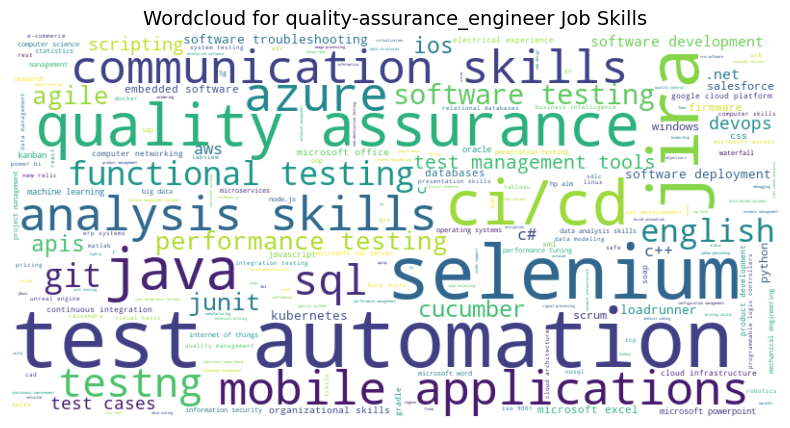

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for {job} Job Skills", fontsize=14)  
plt.axis("off")
plt.show()


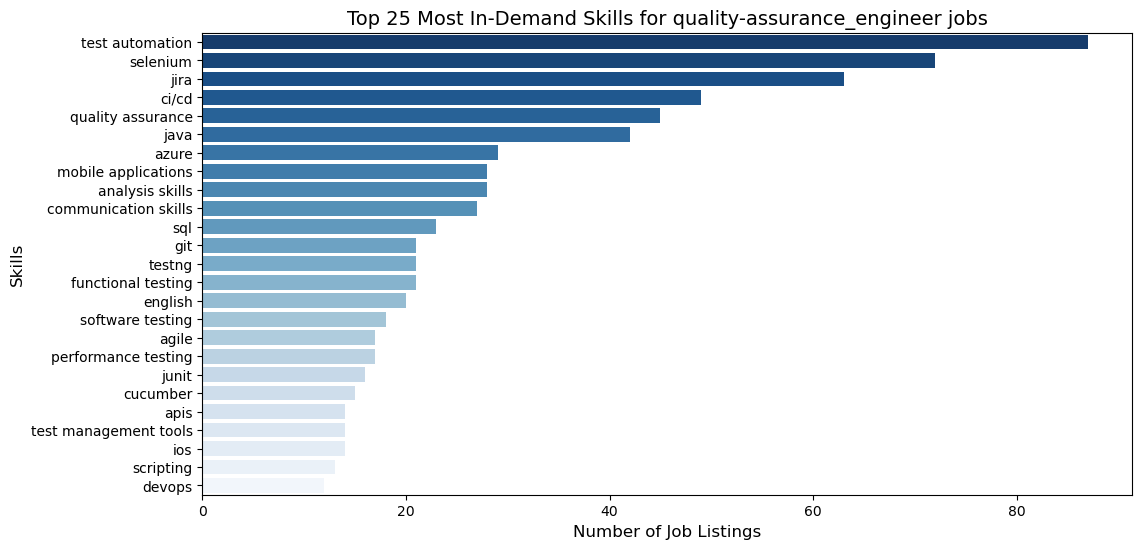

In [78]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [80]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                   company_name  salary_lpa
24                       Aumnux        48.0
81                Fresh Gravity        48.0
65               Dutech Systems        48.0
33   BlueBox Infosoft pvt. Ltd.        48.0
149      PinnacleWorks Infotech        48.0
236        nimble International        48.0
21                Applus IDIADA        48.0
45          Cogitate Technology        48.0
216                      Trawex        42.0
31                     BizTecno        42.0


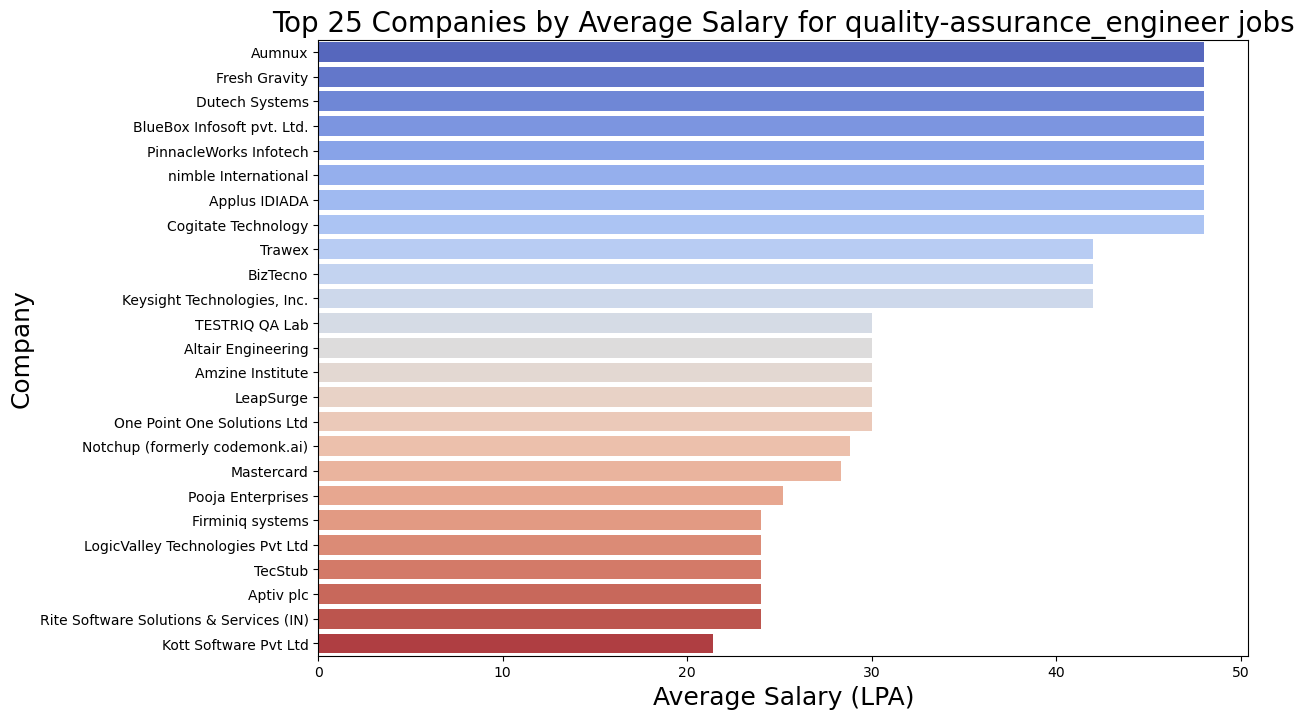

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job} jobs", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

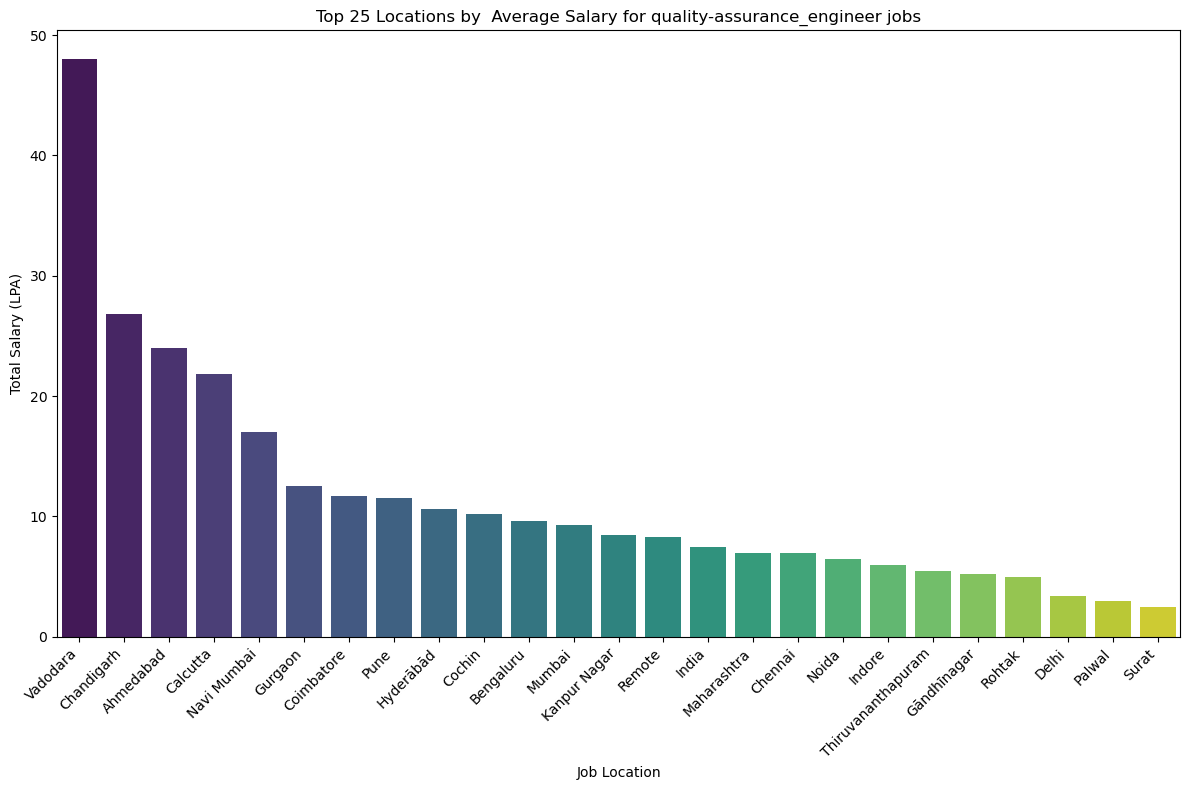

In [83]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job} jobs')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

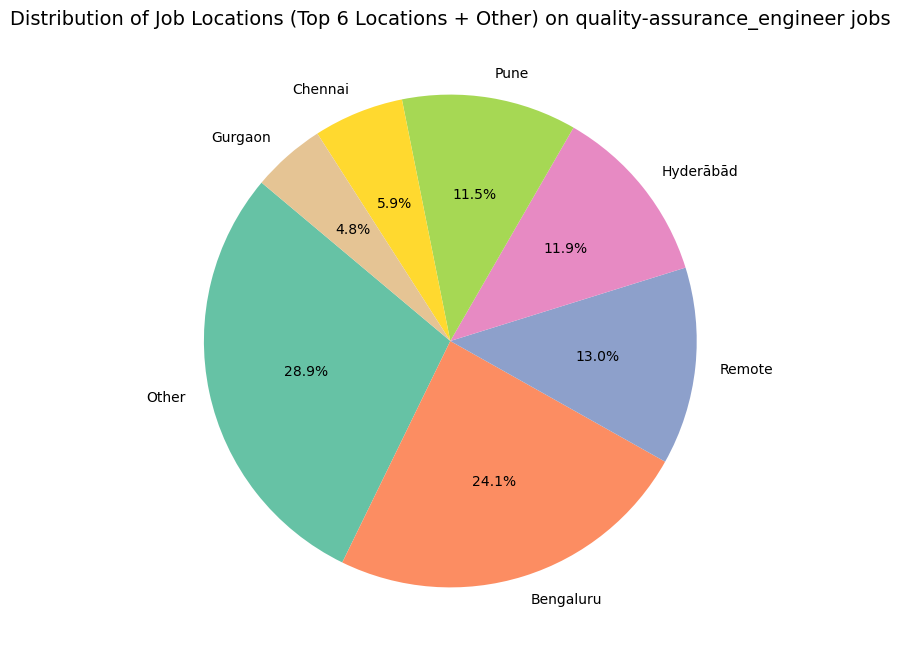

In [84]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job} jobs", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

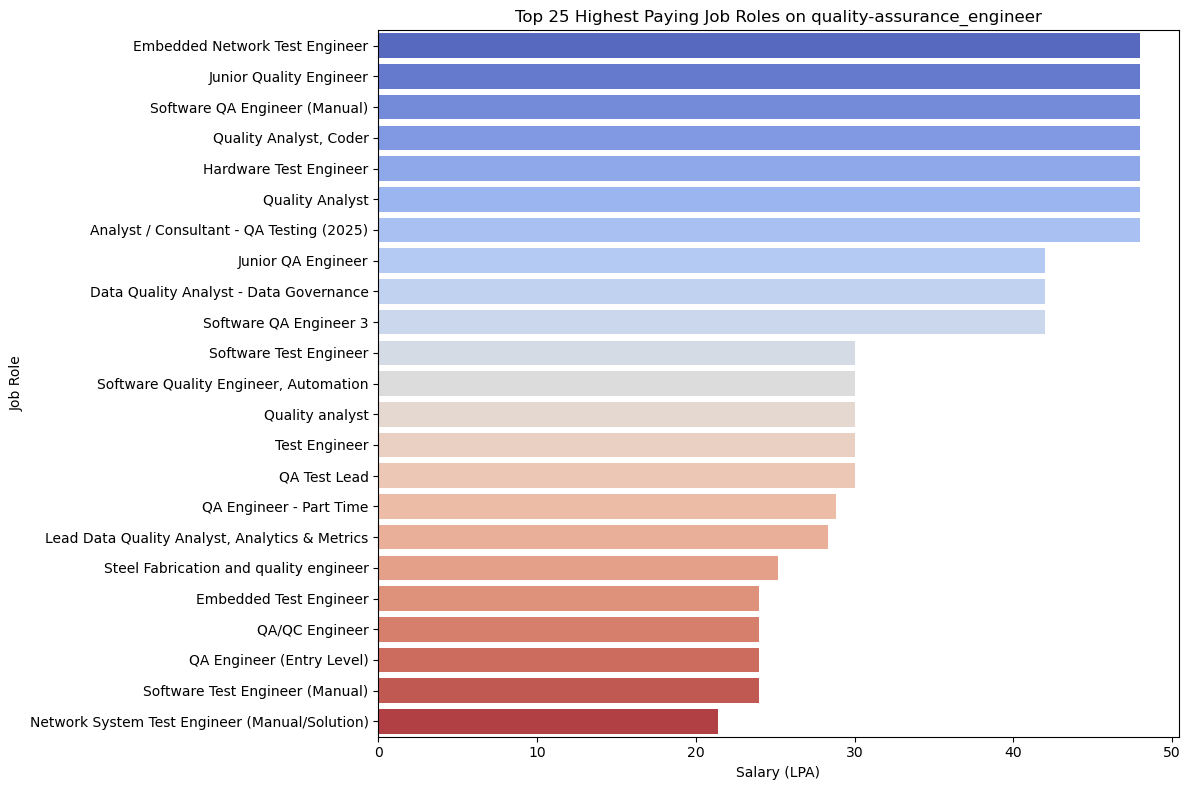

In [86]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [88]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_26636\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


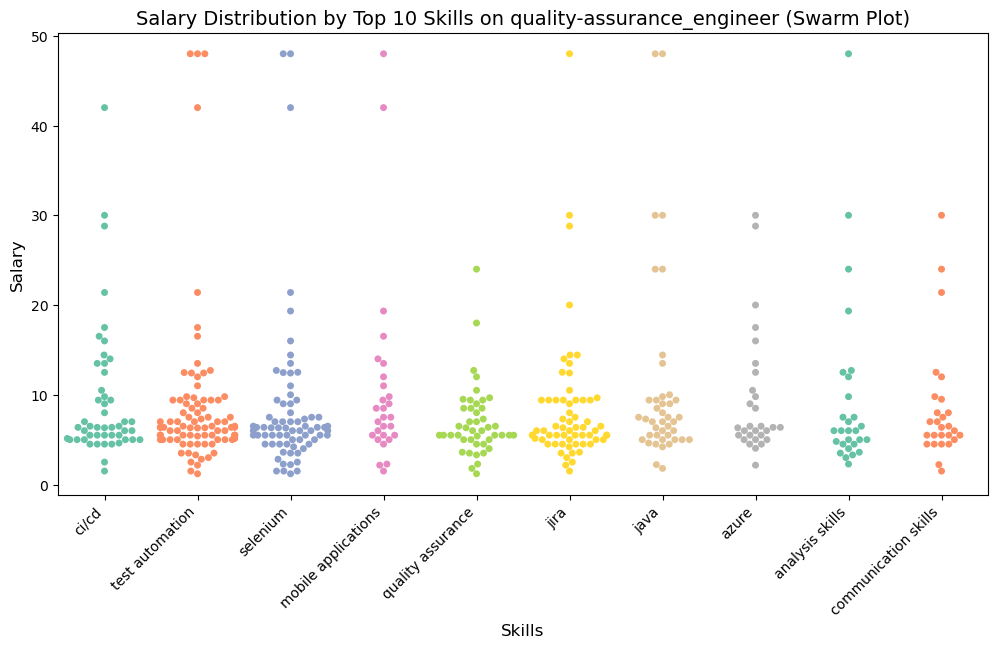

In [89]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

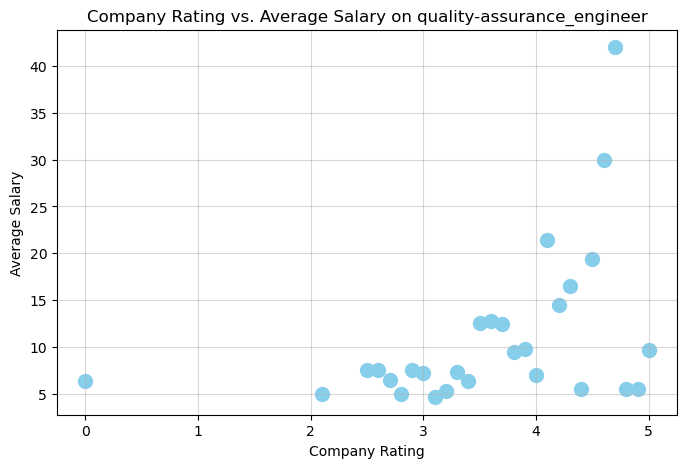

In [91]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [92]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.18328632817909127